In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

df = pd.read_csv('Melbourne-Housing-Data.csv')
len1 = len(df)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
df.dropna(subset='Price', inplace=True)
df.reset_index(drop=True, inplace=True)
len2 = len(df)
df
# len(df['Price'].dropna())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
27243,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
27244,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
27245,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
ratio_dropped = 1 - len2 / len1
ratio_dropped

0.21832056688756918

In [5]:
df['Type'].value_counts()
house_ratio = len(df[df['Type'] == 'h']) / len(df)
house_ratio

0.6779461959114765

[Text(0, 0, '18472'), Text(0, 0, '5909'), Text(0, 0, '2866')]

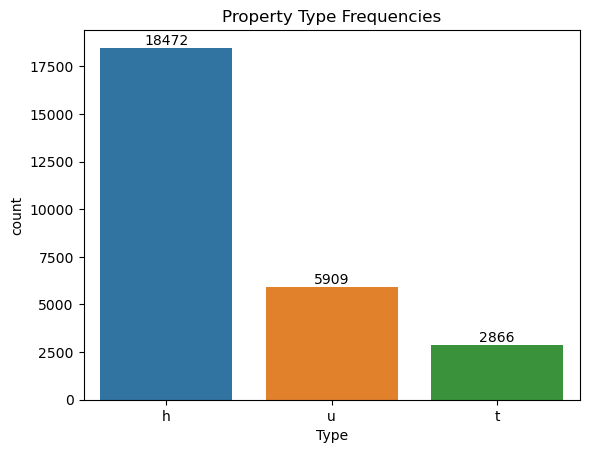

In [6]:
ax = sns.countplot(x=df['Type'], order=df['Type'].value_counts().index)
ax.set_title('Property Type Frequencies')
ax.bar_label(container=ax.containers[0])

In [7]:
room_price_df = df.groupby('Rooms')[['Price']].median()
room_price_df.sort_values(by='Price', ascending=False)

,Price
Rooms,
16,5000000.0
12,2705000.0
10,2115000.0
6,1660000.0
5,1550000.0
8,1535883.0
9,1380000.0
7,1350000.0
4,1205250.0


Text(0.5, 1.0, 'Median Property Price by Rooms Number')

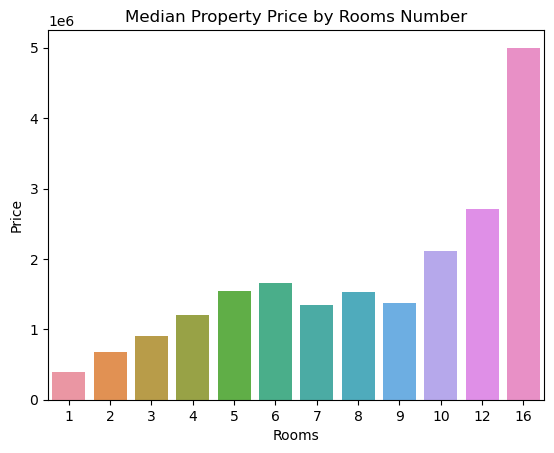

In [8]:
# How does the number of rooms impact the median property price?

room_price_df = df.groupby('Rooms')[['Price']].median()
room_price_df.sort_values(by='Price', ascending=False)
room_price_df.reset_index(inplace=True)

ax = sns.barplot(data=room_price_df, x="Rooms", y="Price")
ax.set_title('Median Property Price by Rooms Number')

In [9]:
# Calculate Spearman Correlation between the two columns

x = room_price_df['Rooms']
y = room_price_df['Price']
res = stats.spearmanr(x, y)
res.statistic

0.8881118881118882

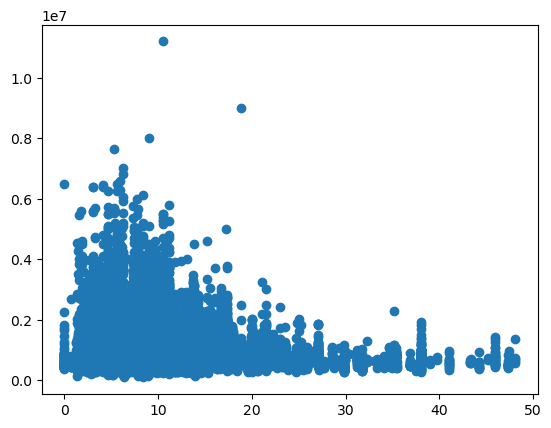

In [10]:
# Correlation Distance - Price

x = df['Distance']
y = df['Price']
plt.plot(x, y, 'o')

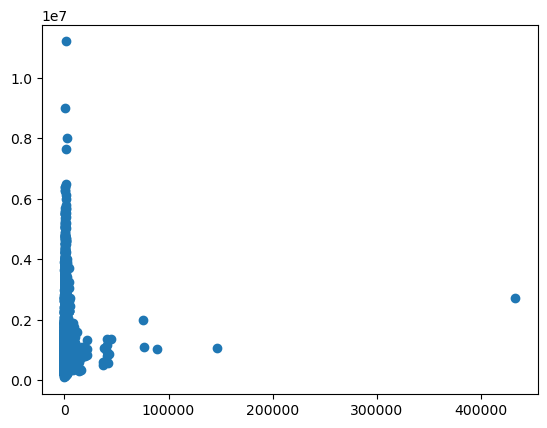

In [11]:
x = df['Landsize']
y = df['Price']
plt.plot(x, y, 'o')

<Axes: >

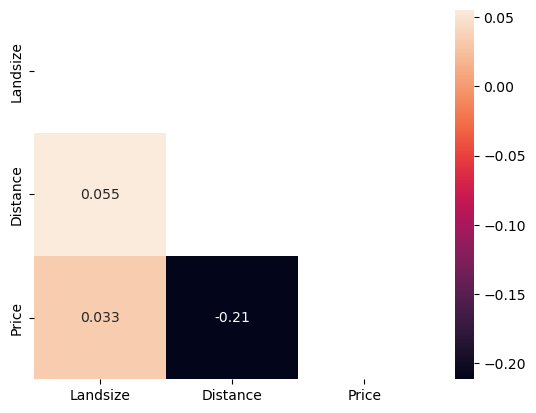

In [12]:
numerical = df.select_dtypes(include=np.number)
corr = numerical[['Landsize','Distance','Price']].corr()
# corr = numerical.corr()
sns.heatmap(corr,annot=True,mask=np.triu(corr))

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(-0.001, 120.0]'),
  Text(1, 0, '(120.0, 255.0]'),
  Text(2, 0, '(255.0, 415.0]'),
  Text(3, 0, '(415.0, 564.0]'),
  Text(4, 0, '(564.0, 649.0]'),
  Text(5, 0, '(649.0, 745.0]'),
  Text(6, 0, '(745.0, 433014.0]')])

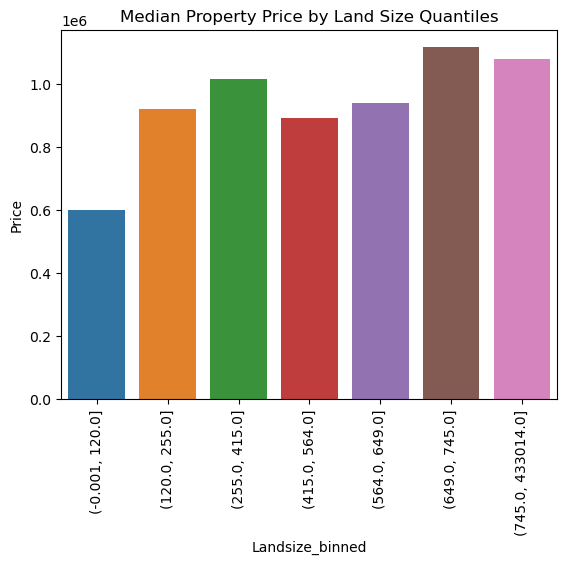

In [13]:
# Better Landsize - Price quantile plot

df['Landsize_binned'] = pd.qcut(df['Landsize'], 7)
size_price_df = df.groupby('Landsize_binned')[['Price']].median()
size_price_df.reset_index(inplace=True)

ax = sns.barplot(data=size_price_df, x="Landsize_binned", y="Price")
ax.set_title('Median Property Price by Land Size Quantiles')
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x166c025c0>,
 'caps': [<matplotlib.lines.Line2D at 0x166c02b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x166c023b0>],
 'medians': [<matplotlib.lines.Line2D at 0x166b2e560>],
 'fliers': [<matplotlib.lines.Line2D at 0x166b87010>],
 'means': []}

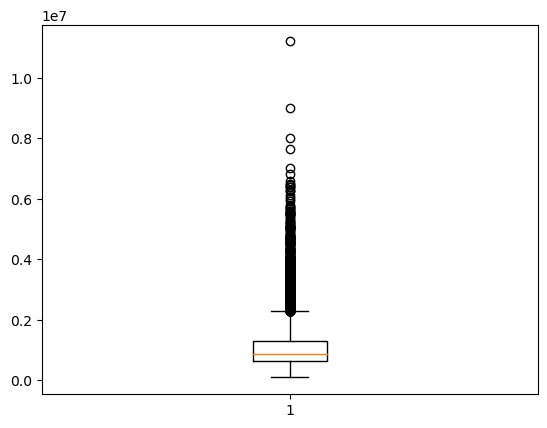

In [14]:
# 9. Properties priced significantly above or below average

plt.boxplot(df['Price'])

In [61]:
df['Price']

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
27242    1480000.0
27243     888000.0
27244     705000.0
27245    1140000.0
27246    1020000.0
Name: Price, Length: 27247, dtype: float64

In [15]:
# Calculate Q1, Q2 and IQR
q1 = df['Price'].quantile(.25)
q3 = df['Price'].quantile(.75)
iqr = q3 - q1

# Apply filter with respect to IQR, including optional whiskers
filter = (df['Price'] < q1 - 1.5*iqr) | (df['Price'] > q3 + 1.5*iqr)
outliers_percentage = len(df.loc[filter]) / len(df)*100
print(f"{round(outliers_percentage,2)}%")

4.69%


((array([-4.05155602, -3.83907604, -3.72296122, ...,  3.72296122,
          3.83907604,  4.05155602]),
  array([   85000.,   112000.,   121000., ...,  8000000.,  9000000.,
         11200000.])),
 (573652.4641138694, 1050173.3449554082, 0.8941694051312766))

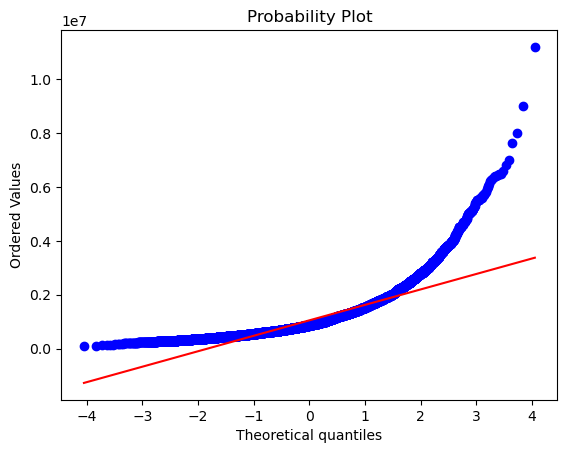

In [16]:
# 10. Compare the distribution of property prices to a normal distribution

stats.probplot(df['Price'], dist="norm", plot=plt)

In [17]:
# Calculate skew and kurtosis

print("Skew:", round(stats.skew(df['Price']),2))
print("Kurtosis:", round(stats.kurtosis(df['Price']),2))

Skew: 2.59
Kurtosis: 13.09


In [51]:
# 11. Kolmogorov-Smirnov normality test

stats.kstest(df['Price'], stats.norm.cdf)
#stats.kstest(df['Price'], 'norm')

# Result: different from normal distribution

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=85000.0, statistic_sign=-1)

In [63]:
def q3(x):
    return x.quantile(1)

df.groupby('Type')['Price'].apply(q3)

Type
h    11200000.0
t     3820000.0
u     6500000.0
Name: Price, dtype: float64

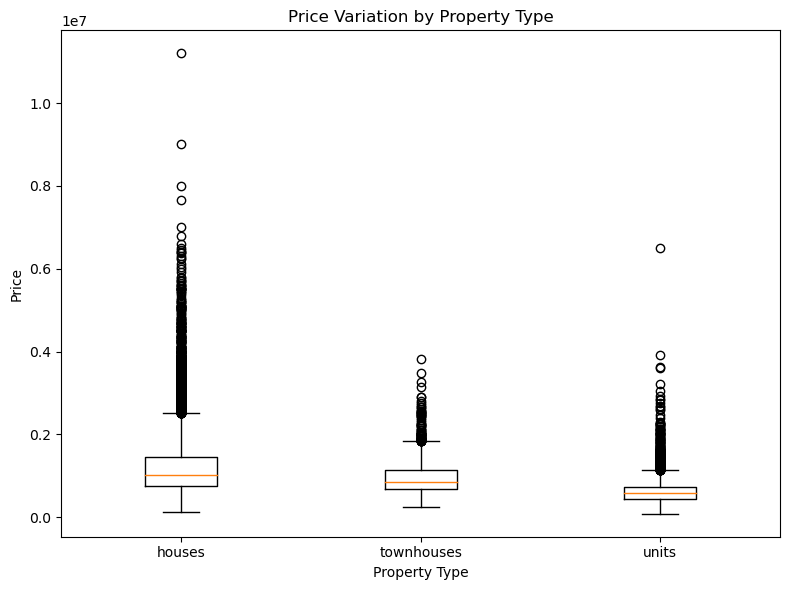

In [64]:
# 12. Boxplot for distribution of property prices for each property type

plt.figure(figsize=(8, 6))  # Set the size of the chart
plt.boxplot(df.groupby('Type')['Price'].apply(list), labels=['houses', 'townhouses', 'units'])

# Add labels and title to the chart
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Variation by Property Type')

# Display the chart
plt.tight_layout()
plt.show()

# Result: Houses have higher property prices than units and townhouses

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Southern Metropolitan'),
  Text(1, 0, 'Eastern Metropolitan'),
  Text(2, 0, 'South-Eastern Metropolitan'),
  Text(3, 0, 'Northern Metropolitan'),
  Text(4, 0, 'Western Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

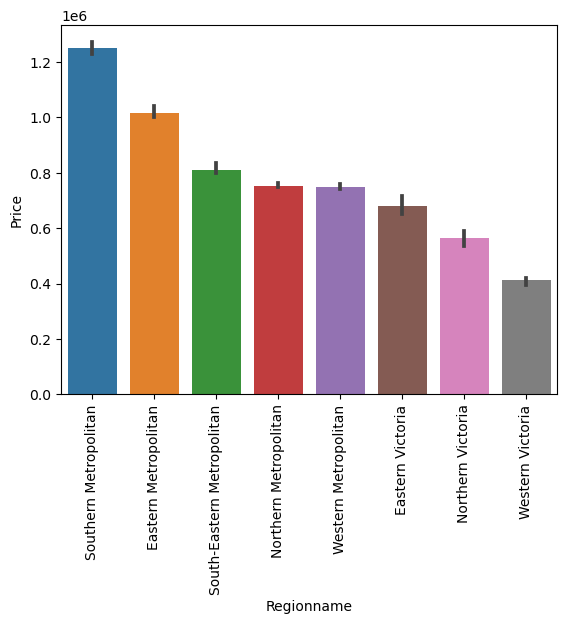

In [84]:
# 13. What is the region with the highest/lowest median price?

order = df.groupby('Regionname')[['Price']].median().sort_values(['Price'], ascending=False).index

sns.barplot(x='Regionname', y='Price', data=df, estimator=np.median, order=order)
plt.xticks(rotation=90)

# Result: Most expensive: Southern Metropolitan, Cheapest: Western Victoria

In [128]:
# 14. Association between regions and price of properties (Chi Squared and Kramer V)

#df.dropna(subset='Regionname', inplace=True) # Tentative to get a non null p-value
df['Price_binned'] = pd.qcut(df['Price'], 5)
contingency_table = pd.crosstab(df['Regionname'], df['Price_binned'])
res = stats.chi2_contingency(contingency_table)
res.statistic
res.dof
print("P-value:", res.pvalue,"\nStatistic:", res.statistic, "\nDegree of freedom:", res.dof)

min_categories = min(contingency_table.shape[0], contingency_table.shape[1])
n = contingency_table.sum().sum()
V = np.sqrt(res.statistic / (n * (min_categories - 1)))
print("Kramer V:", V)

#crosstab

# Result: Yes, there is a significant relationship between the region (Regionname) and the price of properties, and the relationship is waek (None of the above)

P-value: 0.0 
Statistic: 5729.753153907544 
Degree of freedom: 28
Kramer V: 0.22929919217052963


In [144]:
# 15. How much was the percentage increase or decrease in median price of property sold between the earliest year and the latest year?

df['Year'] = df['Date'].apply(lambda x: x.split("/")[2])

median_price = df.groupby('Year')['Price'].median()

difference = ((median_price['2018'] / median_price['2016']) - 1)*100
print("The difference is:", f"{round(difference,2)}%")

The difference is: -5.42%


In [146]:
# 16. Is there a specific month during which more houses are sold?

df['Month'] = df['Date'].apply(lambda x: x.split("/")[1])
df['Month'].value_counts()

Month
11    3407
09    3219
10    3118
05    2620
06    2425
03    2362
07    2358
08    2324
02    2067
12    1490
04    1206
01     648
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '2016/01'),
  Text(1, 0, '2016/02'),
  Text(2, 0, '2016/04'),
  Text(3, 0, '2016/05'),
  Text(4, 0, '2016/06'),
  Text(5, 0, '2016/07'),
  Text(6, 0, '2016/08'),
  Text(7, 0, '2016/09'),
  Text(8, 0, '2016/10'),
  Text(9, 0, '2016/11'),
  Text(10, 0, '2016/12'),
  Text(11, 0, '2017/02'),
  Text(12, 0, '2017/03'),
  Text(13, 0, '2017/04'),
  Text(14, 0, '2017/05'),
  Text(15, 0, '2017/06'),
  Text(16, 0, '2017/07'),
  Text(17, 0, '2017/08'),
  Text(18, 0, '2017/09'),
  Text(19, 0, '2017/10'),
  Text(20, 0, '2017/11'),
  Text(21, 0, '2017/12'),
  Text(22, 0, '2018/01'),
  Text(23, 0, '2018/02'),
  Text(24, 0, '2018/03')])

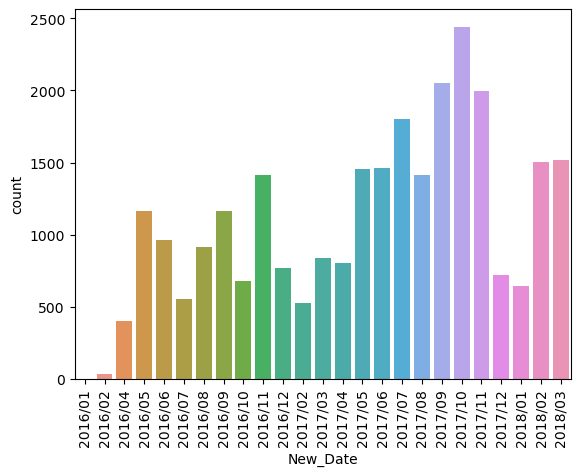

In [175]:
df['New_Date'] = df['Date'].apply(lambda x: f"{x.split('/')[2]}/{x.split('/')[1]}")
sns.countplot(x=df['New_Date'], order=pd.Series(df['New_Date'].unique()).sort_values())
plt.xticks(rotation=90)

# Result: November is the month during which more houses are sold